<a href="https://colab.research.google.com/github/Barissdal/KnowYourMetrics/blob/main/Data_Driven_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

In [3]:
!pip install plotly

In [4]:
import plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

#initiate visualization library for jupyter notebook 
pyoff.init_notebook_mode()

In [5]:
df_ = pd.read_excel("/content/drive/MyDrive/resource/online_retail_II.xlsx",sheet_name="Year 2010-2011")

df = df_.copy()

In [6]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


Revenue = Active Customer Count * Order Count * Average Revenue per Order

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#InvoiceDate string olsaydı aşağıdaki kod ile tarih olarak güncelleyebilirdik

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [9]:
#creating YearMonth field for the ease of reporting and visualization

df['InvoiceYearMonth'] =  df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [10]:
#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns

df['Revenue'] = df['Price'] * df['Quantity']
df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121
5,201105,723333.510
6,201106,691123.120
7,201107,681300.111
8,201108,682680.510
9,201109,1019687.622


In [ ]:
#X and Y axis inputs for Plotly graph. We use Scatter for line graphs

plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [11]:

#using pct_change() function to see monthly percentage change
df_revenue['MonthlyGrowth'] = df_revenue['Revenue'].pct_change()

#showing first 5 rows
df_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


# **Monthly Active Customers**

In [12]:
#creating a new dataframe with UK customers only
df_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)

In [13]:
#creating monthly active customers dataframe by counting unique Customer IDs
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['Customer ID'].nunique().reset_index()

#print the dataframe
df_monthly_active

,InvoiceYearMonth,Customer ID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817
5,201105,985
6,201106,943
7,201107,899
8,201108,867
9,201109,1177


# **Monthly Order Count**

In [14]:
#create a new dataframe for no. of order by using quantity field
df_monthly_sales = df_uk.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
df_monthly_sales

,InvoiceYearMonth,Quantity
0,201012,298101
1,201101,237381
2,201102,225641
3,201103,279843
4,201104,257666
5,201105,306452
6,201106,258522
7,201107,324129
8,201108,319804
9,201109,458490


In [ ]:
#plot
plot_data = [
    go.Bar(
        x=df_monthly_sales['InvoiceYearMonth'],
        y=df_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Total # of Order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [15]:
df_monthly_sales['InvoiceYearMonth'] = df_monthly_sales['InvoiceYearMonth'].map(str)

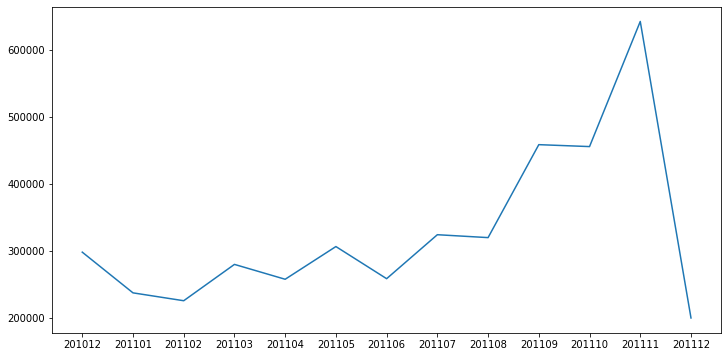

In [16]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_monthly_sales['InvoiceYearMonth'], df_monthly_sales['Quantity'])

# **Average Revenue per Order**

In [17]:
df_monthly_order_avg = df_uk.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

df_monthly_order_avg

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380
5,201105,17.713823
6,201106,16.714748
7,201107,15.723497
8,201108,17.315899
9,201109,18.931723


(13.0, 19.0)

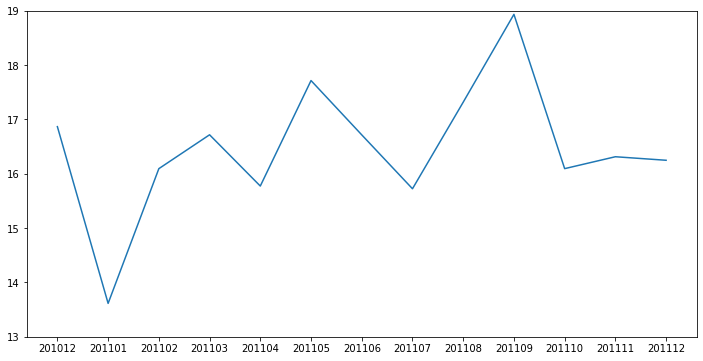

In [18]:
df_monthly_order_avg['InvoiceYearMonth'] = df_monthly_order_avg['InvoiceYearMonth'].map(str)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df_monthly_order_avg['InvoiceYearMonth'], df_monthly_order_avg['Revenue'])
ax.set_ylim([13, 19])

# **New Customer Ratio**

In [25]:
#create a dataframe containing Customer ID and first purchase data

df_min_purchase = df_uk.groupby('Customer ID')['InvoiceDate'].min().reset_index()

df_min_purchase.columns = ['Customer ID','MinPurchaseDate']

df_min_purchase['MinPurchaseYearMonth'] = df_min_purchase['MinPurchaseDate'].map(lambda date:100*date.year + date.month)

In [29]:
#merge first purchase date column to our main dataframe (df_uk)

df_uk = pd.merge(df_uk,df_min_purchase, on='Customer ID')

df_uk.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate_x,MinPurchaseYearMonth_x,MinPurchaseDate_y,MinPurchaseYearMonth_y,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012,2010-12-01 08:26:00,201012


In [30]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month

df_uk['UserType'] = 'New'

df_uk.loc[df_uk['InvoiceYearMonth'] > df_uk['MinPurchaseYearMonth_x'],'UserType'] = 'Existing'

In [35]:
#calculate the Revenue per month for each user type

df_user_type_revenue=df_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()

In [ ]:
#filtering the dates and plot the result
df_user_type_revenue = df_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
plot_data = [
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'Existing'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'Existing'")['Revenue'],
        name = 'Existing'
    ),
    go.Scatter(
        x=df_user_type_revenue.query("UserType == 'New'")['InvoiceYearMonth'],
        y=df_user_type_revenue.query("UserType == 'New'")['Revenue'],
        name = 'New'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='New vs Existing'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

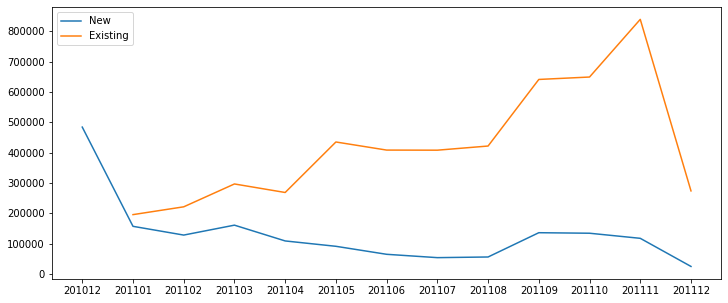

In [88]:
#Graph

df_user_type_revenue['InvoiceYearMonth'] = df_user_type_revenue['InvoiceYearMonth'].map(str)

fig = plt.figure(figsize = (12, 5))
plt.plot(df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'New','InvoiceYearMonth'],df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'New','Revenue'], label = "New")
plt.plot(df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'Existing','InvoiceYearMonth'],df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'Existing','Revenue'], label = "Existing")
plt.legend()
plt.show()

In [51]:
df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'New','Revenue']

0     483799.740
2     156705.770
4     127859.000
6     160567.840
8     108517.751
10     90847.490
12     64479.190
14     53453.991
16     55619.480
18    135667.941
20    133940.280
22    117153.750
24     24447.810
Name: Revenue, dtype: float64

In [56]:
df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'New',['InvoiceYearMonth','Revenue']]

,InvoiceYearMonth,Revenue
0,201012,483799.740
2,201101,156705.770
4,201102,127859.000
6,201103,160567.840
8,201104,108517.751
10,201105,90847.490
12,201106,64479.190
14,201107,53453.991
16,201108,55619.480
18,201109,135667.941


In [55]:
df_user_type_revenue.loc[df_user_type_revenue['UserType'] == 'Existing',['c','Revenue']]

,InvoiceYearMonth,Revenue
1,201101,195275.510
3,201102,220994.630
5,201103,296350.030
7,201104,268226.660
9,201105,434725.860
11,201106,408030.060
13,201107,407693.610
15,201108,421388.930
17,201109,640861.901
19,201110,648837.600


In [77]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)

df_user_ratio = df_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['Customer ID'].nunique() / df_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['Customer ID'].nunique() 

In [84]:
df_user_ratio = df_user_ratio.reset_index(drop=True)
df_user_ratio = df_user_ratio.dropna()
df_user_ratio.columns = ['InvoiceYearMonth','CustomerRatio']

In [87]:
df_user_ratio.head()

,InvoiceYearMonth,CustomerRatio
0,201101,1.124224
1,201102,0.904000
2,201103,0.792233
3,201104,0.510166
4,201105,0.343793


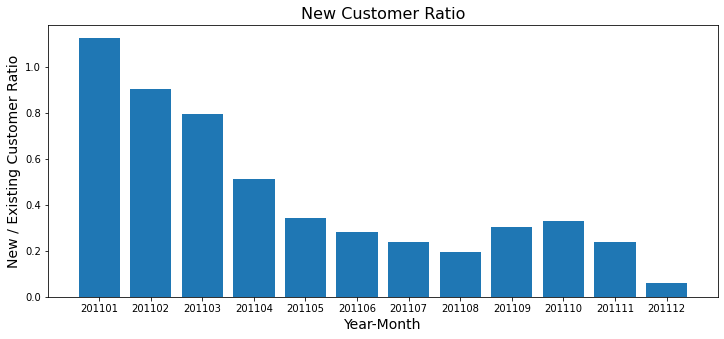

In [94]:
df_user_ratio['InvoiceYearMonth'] = df_user_ratio['InvoiceYearMonth'].map(str)

fig = plt.figure(figsize = (12, 5))

plt.bar(df_user_ratio['InvoiceYearMonth'],df_user_ratio['CustomerRatio'])
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("New / Existing Customer Ratio",fontsize=14)
plt.title("New Customer Ratio",fontsize=16)
plt.show()

# **Monthly Retention Rate**

 **Monthly Retention Rate = Retained Customers From Prev. Month/Active Customers Total**

In [109]:
#identify which users are active by looking at their revenue per month

df_user_purchase = df_uk.groupby(['Customer ID','InvoiceYearMonth'])['Revenue'].sum().astype(int).reset_index()

In [110]:
#create retention matrix with crosstab

df_retention = pd.crosstab(df_user_purchase['Customer ID'], df_user_purchase['InvoiceYearMonth'])

df_retention.head()

InvoiceYearMonth,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
Customer ID,,,,,,,,,,,,,
12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [111]:
months = df_retention.columns[2:]
months[2]
df_retention[months[2]].sum()
df_retention[(df_retention[months[2]] > 0) & (df_retention[months[1]] > 0) ][months[2]].sum()

310

In [112]:
#create an array of dictionary which keeps Retained & Total User count for each month

months = df_retention.columns[2:]
retention_array = []

for i in range(len(months)-1):
  retention_data = {}
  selected_month = months[i+1]
  prev_month = months[i]
  retention_data['InvoiceYearMonth'] = int(selected_month)
  retention_data['TotalUserCount'] = df_retention[selected_month].sum()
  retention_data['RetainedUserCount'] = df_retention[(df_retention[selected_month] > 0) & (df_retention[prev_month] > 0) ][selected_month].sum()
  retention_array.append(retention_data)


In [121]:
#convert the array to dataframe and calculate Retention Rate

df_retention = pd.DataFrame(retention_array)

df_retention['RetentionRate'] = df_retention['RetainedUserCount'] / df_retention['TotalUserCount']

df_retention

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201103,923,305,0.330444
1,201104,817,310,0.379437
2,201105,985,369,0.374619
3,201106,943,417,0.442206
4,201107,899,379,0.421580
5,201108,867,391,0.450980
6,201109,1177,417,0.354291
7,201110,1285,502,0.390661
8,201111,1548,616,0.397933
9,201112,617,402,0.651540


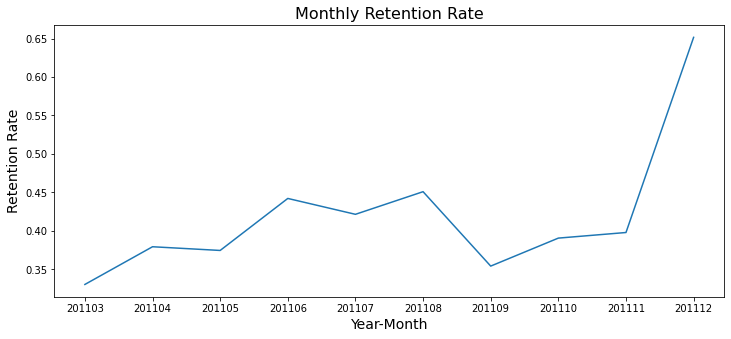

In [123]:
df_retention['InvoiceYearMonth'] = df_retention['InvoiceYearMonth'].map(str)

df_retention.sort_values(by=['InvoiceYearMonth'],ascending=True)

df_retention

fig = plt.figure(figsize = (12, 5))

plt.plot(df_retention['InvoiceYearMonth'],df_retention['RetentionRate'])
plt.xlabel("Year-Month", fontsize=14)
plt.ylabel("Retention Rate",fontsize=14)
plt.title("Monthly Retention Rate",fontsize=16)
plt.show()

# **Cohort Based Retention Rate**

**We will be measuring what percentage of the customers retained after their first purchase in each month.**

In [127]:
#create our retention table again with crosstab() and add firs purchase year month view

df_retention = pd.crosstab(df_user_purchase['Customer ID'], df_user_purchase['InvoiceYearMonth']).reset_index()
df_retention = pd.merge(df_retention,df_min_purchase[['Customer ID','MinPurchaseYearMonth']],on='Customer ID')
new_column_names = [ 'm_' + str(column) for column in df_retention.columns[:-1]]
new_column_names.append('MinPurchaseYearMonth')
df_retention.columns = new_column_names

#create the array of Retained users for each cohort monthly
retention_array = []
for i in range(len(months)):
    retention_data = {}
    selected_month = months[i]
    prev_months = months[:i]
    next_months = months[i+1:]
    for prev_month in prev_months:
        retention_data[prev_month] = np.nan
        
    total_user_count = df_retention[df_retention.MinPurchaseYearMonth ==  selected_month].MinPurchaseYearMonth.count()
    retention_data['TotalUserCount'] = total_user_count
    retention_data[selected_month] = 1 
    
    query = "MinPurchaseYearMonth == {}".format(selected_month)
    

    for next_month in next_months:
        new_query = query + " and {} > 0".format(str('m_' + str(next_month)))
        retention_data[next_month] = np.round(df_retention.query(new_query)['m_' + str(next_month)].sum()/total_user_count,2)
    retention_array.append(retention_data)
    
df_retention = pd.DataFrame(retention_array)
df_retention.index = months

#showing new cohort based retention table
df_retention

,TotalUserCount,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
InvoiceYearMonth,,,,,,,,,,,,
201102,339,1.0,0.25,0.19,0.28,0.28,0.25,0.26,0.28,0.28,0.31,0.10
201103,408,NaN,1.00,0.19,0.26,0.22,0.23,0.17,0.26,0.24,0.29,0.09
201104,276,NaN,NaN,1.00,0.22,0.22,0.22,0.21,0.23,0.23,0.26,0.08
201105,252,NaN,NaN,NaN,1.00,0.23,0.17,0.17,0.21,0.24,0.27,0.10
201106,207,NaN,NaN,NaN,NaN,1.00,0.21,0.16,0.25,0.26,0.32,0.10
201107,172,NaN,NaN,NaN,NaN,NaN,1.00,0.20,0.19,0.23,0.28,0.11
201108,140,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.26,0.23,0.26,0.14
201109,275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.29,0.33,0.12
201110,318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.27,0.13
